##### The following imported data is a real data set of employees working in a company. The analysis was done from the percpective of productivity manager of the company. The main objective of the analysis is to predict whethere or not an employee will be absent for a specific number of hours in a work day. Understading this would help in understanding the pain points of the organization and also can help in reorganising the working structure of the company to increase the productivity.
#####  We are exploring the data to find whether a person presenting certain characterisitcs is expected to be away from work at some point in time or not
##### The features(characteristics) we are considering to predict the above mentioned target are:
- Reason for Absence
- Month of the Year
- Day of the Week
- Distance from Work
- Age
- Body Mass Index
- Work load average per day
- Education
- Number of children / Pets

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

# Reading Data

In [2]:
raw_csv_data = pd.read_csv('Absenteeism_data.csv')
df = raw_csv_data.copy()

In [3]:
## understanding the data
raw_csv_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [4]:
##checking for null points in the data
raw_csv_data.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [5]:
##The ID of an employee doesnt have any effect on the absenteeism. Hence dropping that feature.

df.drop(['ID'],axis=1)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


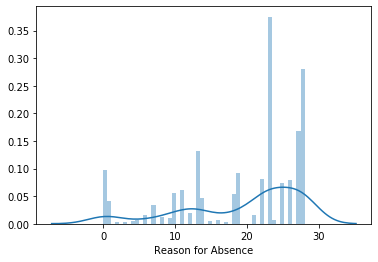

In [6]:
    sns.distplot(df['Reason for Absence'],bins=50)

In [7]:
df['Reason for Absence'].value_counts()

23    147
28    110
27     66
13     52
0      38
19     36
22     32
26     31
25     29
11     24
10     22
18     21
14     18
1      16
7      13
12      8
6       6
21      6
8       5
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for Absence, dtype: int64

# Data Cleaning - Pre Processing

In [8]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)

In [9]:
df = df.drop(['Reason for Absence'],axis = 1)

##### Reason 1 ---> Serious Medical Reasons
##### Reason 2 ----> Pregnency Reasons
##### Reason 3 ----> Food Poisoning reasons
##### Reason 4 ----> Medical Consultation reasons

In [10]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:28].max(axis=1)

In [11]:
reason_type_1.values.sum()

175

In [12]:
df.columns.values

array(['ID', 'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours'], dtype=object)

In [13]:
df = pd.concat([df, reason_type_1,reason_type_2,reason_type_3,reason_type_4], axis = 1)

In [14]:
column_names =  [ 'ID', 'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hour2','Reason1', 'Reason2','Reason3','Reason4']
df.columns = column_names
column_names_reordered =  ['Reason1', 'Reason2','Reason3','Reason4', 'ID', 'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hour2']
df = df[column_names_reordered]

## Creating a Check point - 1 After modifying reason column

In [15]:
df_reason_mod = df.copy()

In [16]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format = '%d/%m/%Y')

In [17]:
month_list = []

In [18]:
for i in range(len(df_reason_mod['Date'])) :
    month_list.append(df_reason_mod['Date'][i].month)

In [19]:
df_reason_mod['Month Value'] = month_list

In [20]:
def get_weekday(date_value):
    return date_value.weekday()

In [21]:
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(get_weekday)

In [22]:
df_reason_mod

,Reason1,Reason2,Reason3,Reason4,ID,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hour2,Month Value,Day of the Week
0,0,0,0,1,11,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,36,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,3,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,11,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,17,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2
696,1,0,0,0,28,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2
697,1,0,0,0,18,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,3
698,0,0,0,1,25,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,3


In [24]:
df_reason_date_mod = df_reason_mod.copy()

In [25]:
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0,2:1,3:1,4:1})

## Final Check point 

In [26]:
df_preprocess = df_reason_date_mod.copy() 

# Selecting and Creating Inputs for the Regression

In [27]:
df_preprocess.columns.values

array(['Reason1', 'Reason2', 'Reason3', 'Reason4', 'ID', 'Date',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hour2', 'Month Value',
       'Day of the Week'], dtype=object)

In [28]:
target = np.where(df_preprocess['Absenteeism Time in Hour2'] > df_preprocess['Absenteeism Time in Hour2'].median(), 1, 0)

In [29]:
need_to_scale_features_data = df_preprocess.drop(['Absenteeism Time in Hour2', 'Date','ID','Reason1','Reason2','Reason3','Reason4','Education', 'Distance to Work',
                                                 'Daily Work Load Average', 'Day of the Week'], axis = 1)

In [30]:
no_need_to_scale_features_data = df_preprocess.drop([ 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index',
       'Children', 'Pets', 'Absenteeism Time in Hour2', 'Month Value',
       'Day of the Week','Absenteeism Time in Hour2', 'Date','ID'], axis = 1)

In [31]:
need_to_scale_features_data.columns.values
#no_need_to_scale_features_data.columns.values

array(['Transportation Expense', 'Age', 'Body Mass Index', 'Children',
       'Pets', 'Month Value'], dtype=object)

In [32]:
scaled_df_column_name = ['Reason1', 'Reason2', 'Reason3', 'Reason4', 'Education','Transportation Expense', 'Age',
       'Body Mass Index', 'Children', 'Pets',
       'Month Value']

In [33]:
SS = StandardScaler()

In [34]:
scaled_data = SS.fit_transform(need_to_scale_features_data)

In [35]:
type(no_need_to_scale_features_data)

pandas.core.frame.DataFrame

In [36]:
unscalable_data = pd.DataFrame(scaled_data)

In [37]:
type(unscalable_data)

pandas.core.frame.DataFrame

In [38]:
scaled_data_features = pd.concat([no_need_to_scale_features_data,unscalable_data],axis=1)

In [39]:
scaled_data_features.columns = scaled_df_column_name
scaled_data_features

,Reason1,Reason2,Reason3,Reason4,Education,Transportation Expense,Age,Body Mass Index,Children,Pets,Month Value
0,0,0,0,1,0,1.005844,-0.536062,0.767431,0.880469,0.268487,0.182726
1,0,0,0,0,0,-1.574681,2.130803,1.002633,-0.019280,-0.589690,0.182726
2,0,0,0,1,0,-0.654143,0.248310,1.002633,-0.919030,-0.589690,0.182726
3,1,0,0,0,0,0.854936,0.405184,-0.643782,0.880469,-0.589690,0.182726
4,0,0,0,1,0,1.005844,-0.536062,0.767431,0.880469,0.268487,0.182726
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,1,-0.654143,0.562059,-1.114186,0.880469,-0.589690,-0.388293
696,1,0,0,0,0,0.040034,-1.320435,-0.643782,-0.019280,1.126663,-0.388293
697,1,0,0,0,1,1.624567,-1.320435,-0.408580,-0.919030,-0.589690,-0.388293
698,0,0,0,1,1,0.190942,-0.692937,-0.408580,-0.919030,-0.589690,-0.388293


In [40]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data_features,target,test_size=0.25, random_state=42)

In [41]:
absenteeism_model = LogisticRegression()

In [42]:
absenteeism_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
model_intercept = absenteeism_model.intercept_

model_coeff = absenteeism_model.coef_

In [44]:
all_model_params = np.append(model_coeff,model_intercept.reshape(1,1),axis = 1)
all_model_params.transpose
model_log_odds = np.exp(all_model_params)

In [45]:
feature_names = np.array([scaled_data_features.columns]).reshape(11,1)
feature_names = np.append(feature_names,[['Intercept']],axis=0)

In [46]:
feature_names.shape

(12, 1)

In [47]:
coeff_vals = pd.DataFrame(np.append(feature_names,all_model_params.reshape(12,1),axis=1))
coeff_vals = pd.DataFrame(np.append(coeff_vals,model_log_odds.reshape(12,1),axis=1))
coeff_vals.columns = ['Features','Coeff Values','Log Odds']
coeff_vals.sort_values(by = 'Coeff Values', ascending = False)

,Features,Coeff Values,Log Odds
2,Reason3,3.0768,21.689
0,Reason1,2.79401,16.3465
3,Reason4,0.893237,2.44303
1,Reason2,0.687708,1.98915
5,Transportation Expense,0.682312,1.97845
8,Children,0.417835,1.51867
7,Body Mass Index,0.264865,1.30325
10,Month Value,0.0897915,1.09395
4,Education,-0.0839303,0.919495
6,Age,-0.215872,0.805839


In [48]:
absenteeism_model.score(x_train,y_train)

0.7790476190476191

In [49]:
absenteeism_model.score(x_test,y_test)

0.7828571428571428

In [58]:
with open('model','wb') as file:
    pickle.dump(absenteeism_model,file)